In [1]:
import matplotlib.pyplot as plt

In [2]:
# %matplotlib widget

In [3]:
import numpy as np
import os
from astropy.table import Table,hstack,vstack

In [4]:
import seaborn as sb
import pandas as pd
from scipy import stats

In [5]:
from collections import OrderedDict
# from quickreduce_funcs import digest_filenumbers
# from create_merged_target_list import create_mtl
#
# import configparser

In [6]:
corcut = 0.3
catalog_loc = "/Users/kremin/M2FSdata/catalogs/merged_target_lists"
cat_name = 'full_dataset_table.csv'
# catalog_loc = '../data/catalogs/merged_target_lists/'

In [7]:
if cat_name.split('.')[-1] == 'csv':
    typ = 'ascii.csv'
else:
    typ = cat_name.split('.')[-1]
tab = Table.read(os.path.join(catalog_loc,cat_name),format=typ)

In [8]:

mask_by_row = np.array([id.split('-')[0] for id in tab['TARGETID']])
masks = np.unique(mask_by_row)
# 'RA'
# 'DEC'
# 'SDSS12_OBJID'
# 'SDSS_zsp'
# 'z_est_bary'  is given as 'z'
# 'Proj_R_asec'  is given as 'R [asec]'
# 'v [km/s]'
# 'FIBERNUM'
print('Masks :\t',len(masks))
mask_selectors = OrderedDict()
for mask in masks:
    mask_selectors[mask] = mask_by_row == mask
    print(mask,':\tngals=',np.sum(mask_selectors[mask]))

Masks :	 21
A02 :	ngals= 170
A04 :	ngals= 185
A07 :	ngals= 154
A09 :	ngals= 108
A10 :	ngals= 121
A11 :	ngals= 185
A20 :	ngals= 207
A21 :	ngals= 244
A22 :	ngals= 242
A23 :	ngals= 244
A26 :	ngals= 217
B02 :	ngals= 196
B04a :	ngals= 198
B04b :	ngals= 193
B05 :	ngals= 187
B06 :	ngals= 236
B07 :	ngals= 245
B08 :	ngals= 243
B09 :	ngals= 226
B10 :	ngals= 226
B11 :	ngals= 204


In [9]:
tab.colnames

['FIBERNUM',
 'redshift_est',
 'cor',
 'template',
 'SNavg',
 'SNHKmin',
 'HSN',
 'KSN',
 'GSN',
 'RA',
 'DEC',
 'SDSS_zsp',
 'sdss_zph',
 'sdss_rmag',
 'MAG',
 'z',
 'R [asec]',
 'Proj_R_Comoving_Mpc',
 'v [km/s]',
 'SDSS_only',
 'sdss_RA_ICRS',
 'sdss_DE_ICRS',
 'sdss_mode',
 'sdss_q_mode',
 'sdss_class',
 'sdss_m_SDSS12',
 'sdss_ObsDate',
 'sdss_Q',
 'sdss_umag',
 'sdss_e_umag',
 'sdss_gmag',
 'sdss_e_gmag',
 'sdss_e_rmag',
 'sdss_imag',
 'sdss_e_imag',
 'sdss_zmag',
 'sdss_e_zmag',
 'sdss_e_zph',
 'sdss___zph_',
 'TYPE',
 'EPOCH',
 'TARGETID',
 'SDSS12_OBJID',
 'RA_targeted',
 'DEC_targeted',
 'z_est_helio',
 'z_clust_lit']

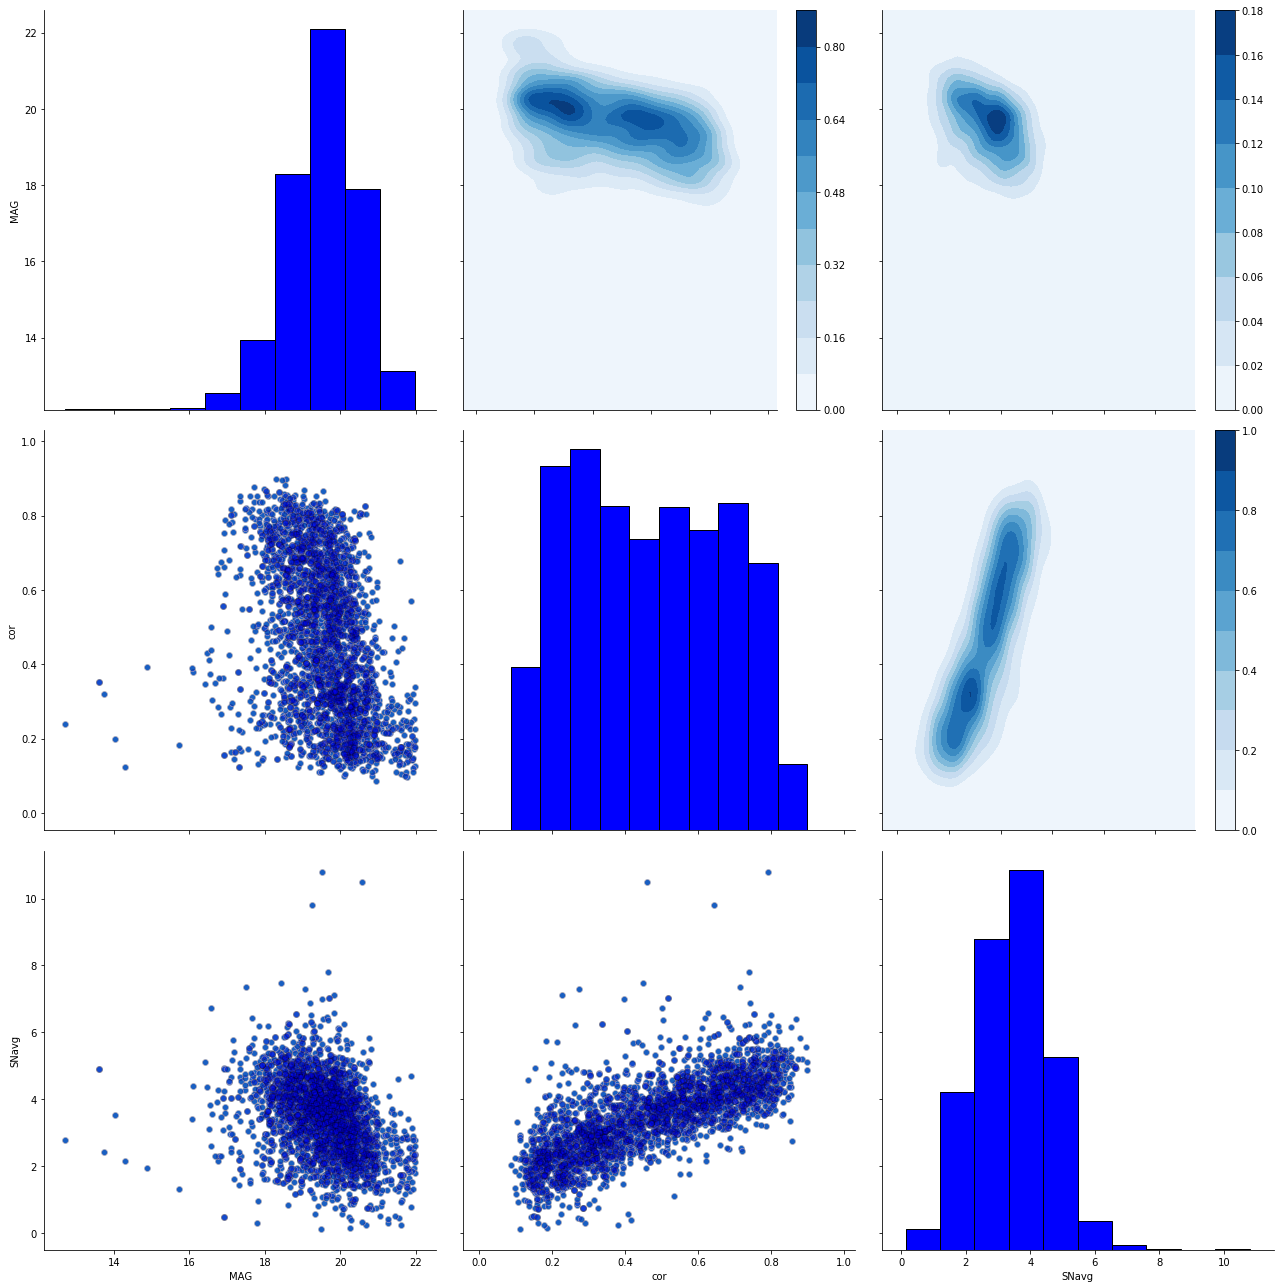

In [32]:
plt.close('all')
outtab = tab.filled()
valid_sns = outtab[((outtab['SNavg']>0)&(outtab['SNavg']<18)&(outtab['MAG']<24.9)&(outtab['MAG']>0)&(outtab['cor']>0)&(outtab['cor']<10))].to_pandas()
params = ['MAG','cor','SNavg']
#vars=params, hue = 'MAG',
grid = sb.pairplot(valid_sns[params], size = 6)

# Map a scatter plot to the upper triangle
grid = grid.map_lower(plt.scatter, color = 'blue', alpha=0.2,edgecolor= 'k')
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'blue', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_upper(sb.kdeplot, cmap="Blues", shade=True,shade_lowest=True,cbar=True)



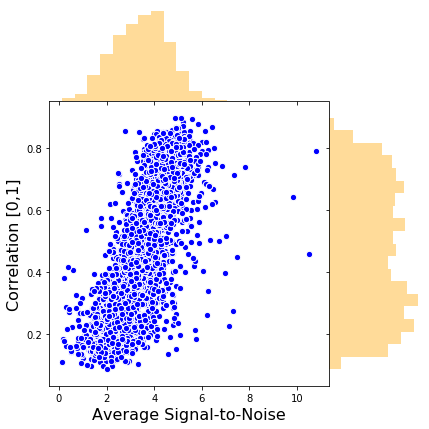

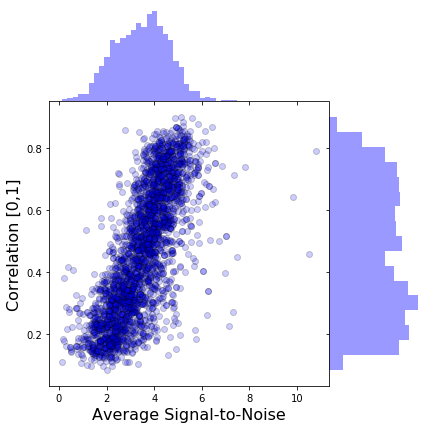

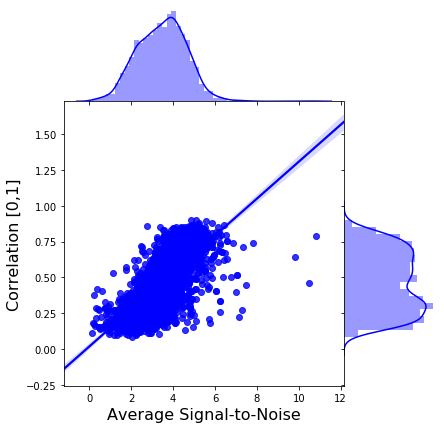

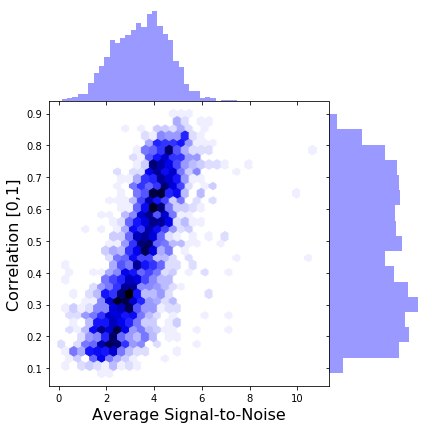

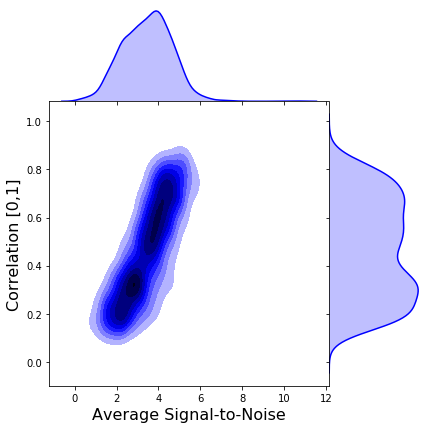

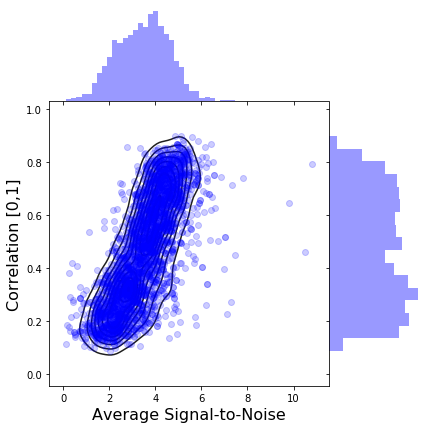

In [75]:
plt.close('all')



size, fontsize = 6, 12
numbins,ratio = 20, 3
keyword_args = {'x':"SNavg", 'y':"cor", 'data':valid_sns,'height':size,'ratio':ratio, 'space':0}

g = sb.JointGrid(**keyword_args)
g = g.plot_joint(plt.scatter,
                  color="b", s=40, edgecolor="white")
g = g.plot_marginals(sb.distplot, kde=False, color="orange",bins=numbins)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)
plt.show()

keyword_args['color'] = 'b'

g = sb.jointplot(alpha=0.2, **keyword_args,edgecolor='k')
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)
# g = g.annotate(stats.pearsonr)

g = sb.jointplot(kind="reg",**keyword_args)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

g = sb.jointplot(kind="hex",**keyword_args)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

g = sb.jointplot(kind="kde", shade=True,shade_lowest=False,edgecolor='k',**keyword_args)
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

g = (sb.jointplot(alpha=0.2, **keyword_args)
        .plot_joint(sb.kdeplot, zorder=0, shade=False,n_levels=10,color='k'))
g = g.set_axis_labels('Average Signal-to-Noise', 'Correlation [0,1]',size=16)

In [102]:

def generate_plot_examples(intab,xcol,ycol,xname,yname,title):
    plt.close('all')

    snmin,snmax = 0.,18.
    magmin,magmax = 16, 24.9
    cormin,cormax = 0.,1.
    params = [xcol,ycol]
    outtab = intab.filled()
    valid_sns = outtab[((outtab['SNavg']>snmin)&(outtab['SNavg']<snmax)&(outtab['MAG']<magmax)&(outtab['MAG']>magmin)&
                        (outtab['cor']>cormin)&(outtab['cor']<cormax))]
    valid_sns = valid_sns[params].to_pandas()

    size = 6
    numbins,ratio = 20, 3
    xlab,ylab = xname, yname
    fontsize, titlesize = 16, 20
    title_fracshift = 1.04
    keyword_args = {'x':xcol, 'y':ycol, 'data':valid_sns,'height':size,'ratio':ratio, 'space':0}

    g = sb.JointGrid(**keyword_args)
    g = g.plot_joint(plt.scatter,
                      color="b", s=40, edgecolor="white")
    g = g.plot_marginals(sb.distplot, kde=False, color="orange",bins=numbins)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()
    
    
    g = sb.JointGrid(**keyword_args)
    g = g.plot_joint(plt.scatter,
                      color="b", s=40, edgecolor="white")    
    _ = g.ax_marg_x.hist(keyword_args['data'][xcol], color="orange", alpha=.6,
                      bins=numbins)
    _ = g.ax_marg_y.hist(keyword_args['data'][ycol], color="r", alpha=.6,
                      orientation="horizontal",
                      bins=numbins)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()
    
    keyword_args['color'] = 'b'

    g = sb.jointplot(alpha=0.2, **keyword_args,edgecolor='k')
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()
    # g = g.annotate(stats.pearsonr)

    g = sb.jointplot(kind="reg",**keyword_args)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

    g = sb.jointplot(kind="hex",**keyword_args)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

    g = sb.jointplot(kind="kde", shade=True,shade_lowest=False,edgecolor='k',**keyword_args)
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

    g = (sb.jointplot(alpha=0.2, **keyword_args)
            .plot_joint(sb.kdeplot, zorder=0, shade=False,n_levels=2*int(np.ceil(np.log10(len(keyword_args['data'])))),color='k'))
    g = g.set_axis_labels(xlab,ylab,size=fontsize)
    plt.suptitle(title, size = titlesize, y=title_fracshift)
    plt.show()

C:\Users\kremin\Anaconda3\lib\site-packages\astropy\table\column.py:981: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
C:\Users\kremin\Anaconda3\lib\site-packages\astropy\table\column.py:981: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


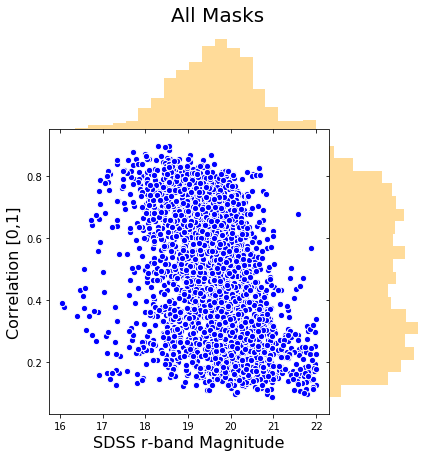

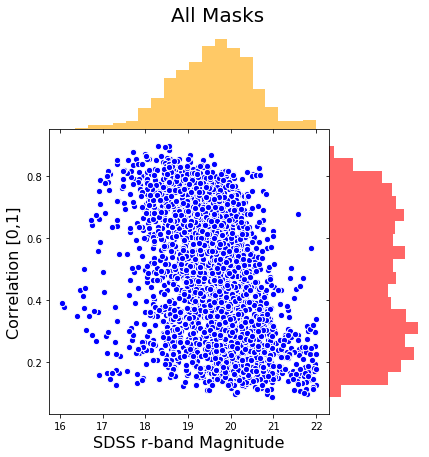

C:\Users\kremin\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


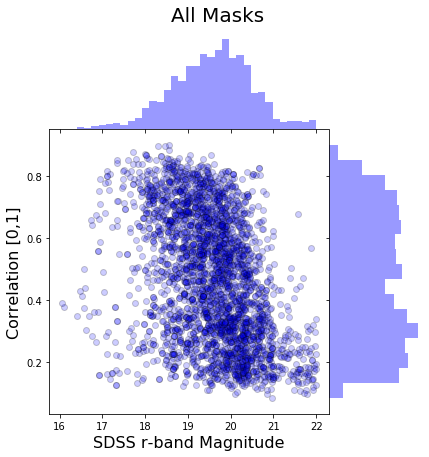

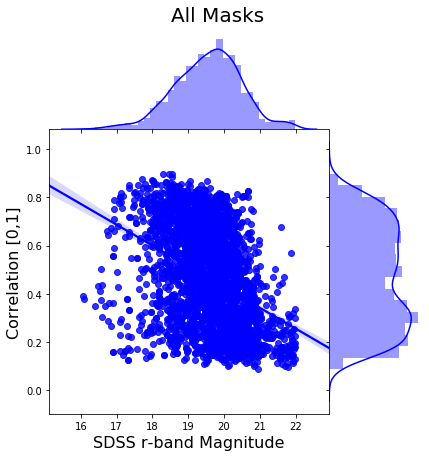

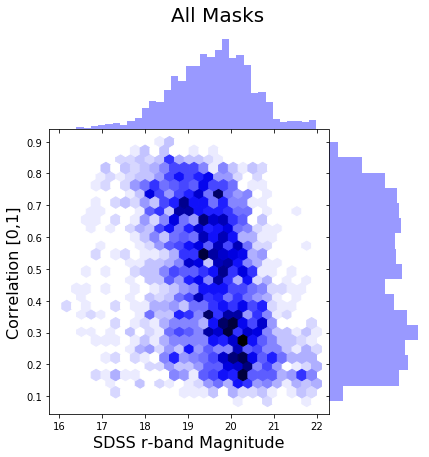

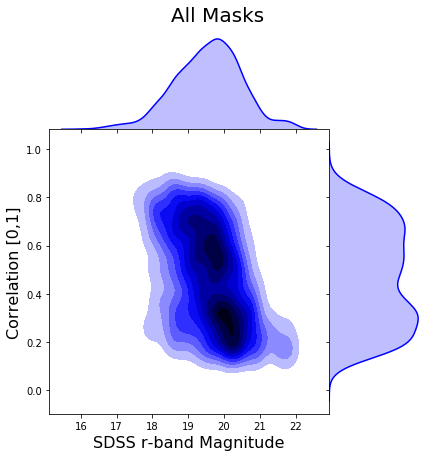

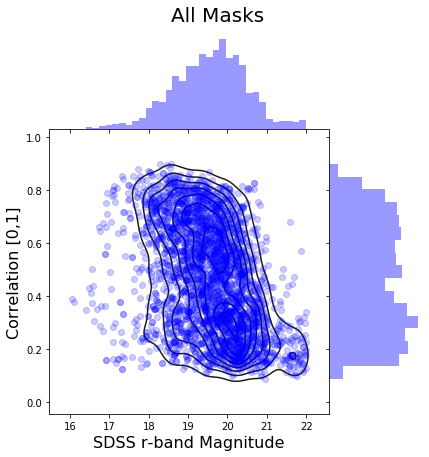

In [100]:
generate_plot_examples(tab, "MAG", "cor",'SDSS r-band Magnitude', 'Correlation [0,1]','All Masks')
# 'SNavg' 'Average Signal-to-Noise'

In [ ]:
plt.close('all')

def make_mag_cor_sn_plot(intab,tabname):
    valid_sns = intab[intab['SNavg']>0]
    plt.figure()
    plt.scatter(valid_sns['MAG'],valid_sns['cor'],c=valid_sns['SNavg'],alpha=0.4)
    plt.colorbar(label='SNavg')
    plt.xlabel('SDSS r Magnitude')
    plt.ylabel("Correlation Value [0,1]")
    plt.title(tabname)

make_mag_cor_sn_plot(tab,"All Masks")

for mask,masklocs in mask_selectors.items():
    maskonly_tab = tab[masklocs]
    magdiffs = np.abs(maskonly_tab['MAG']-maskonly_tab['sdss_rmag'])
    print(np.sum(magdiffs[magdiffs<100.]))
    make_mag_cor_sn_plot(maskonly_tab,mask)

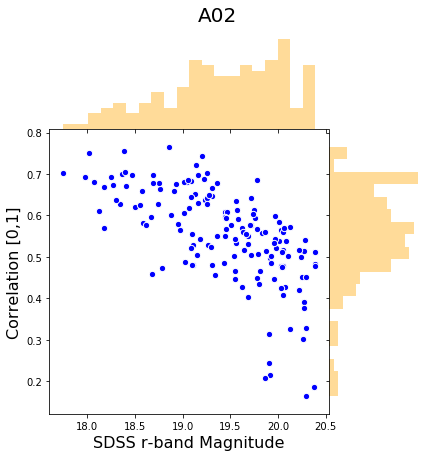

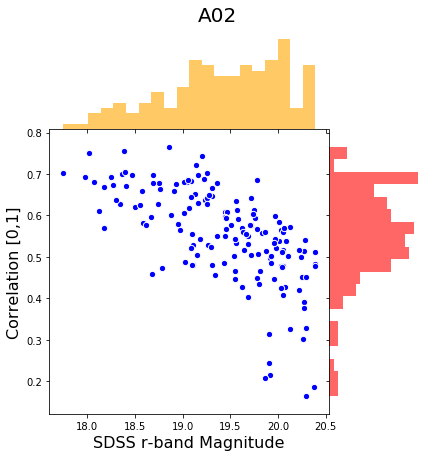

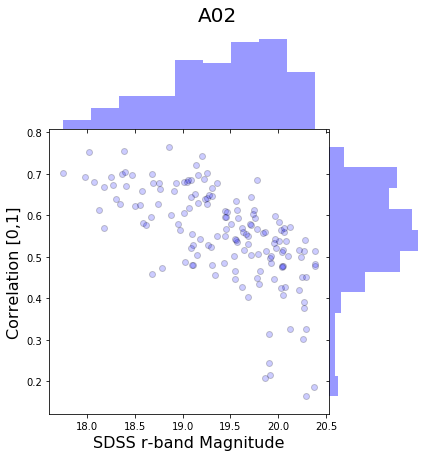

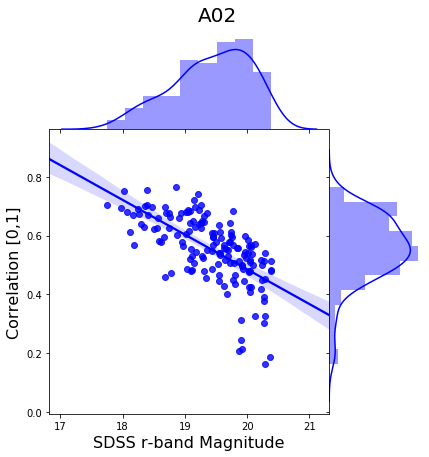

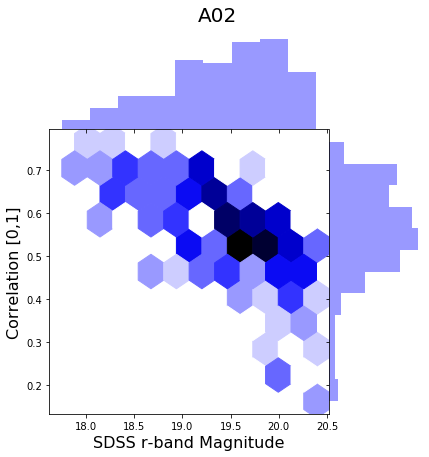

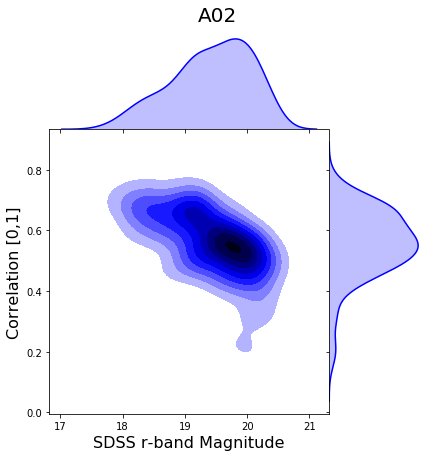

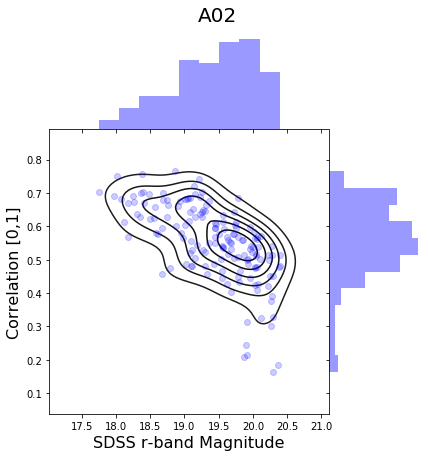

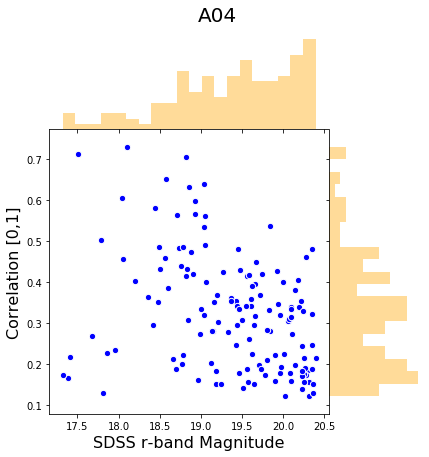

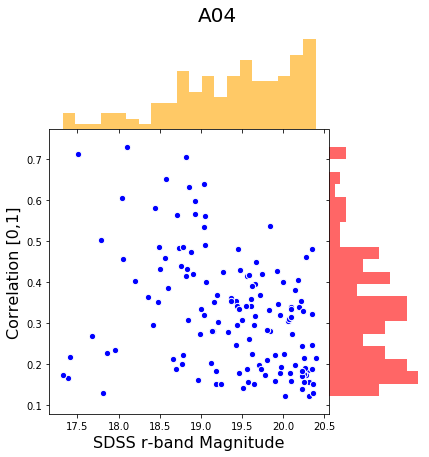

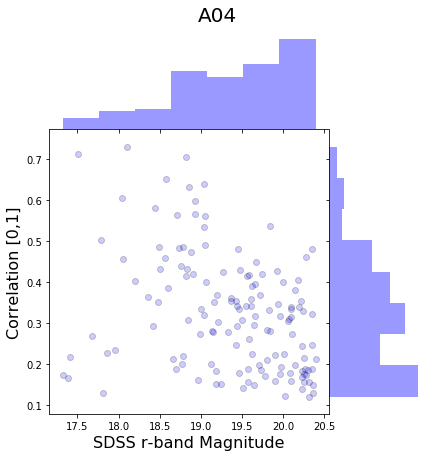

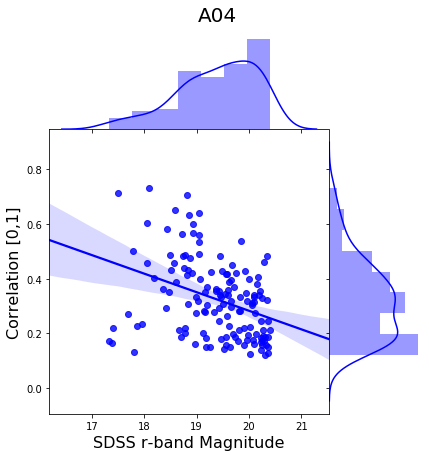

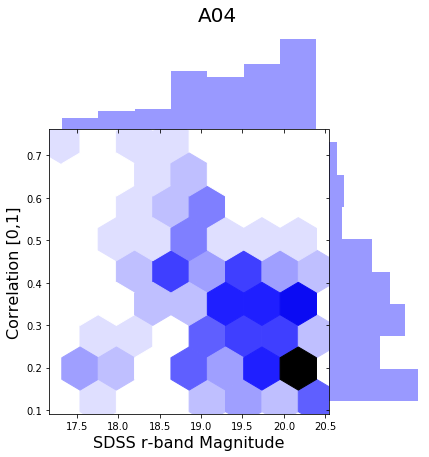

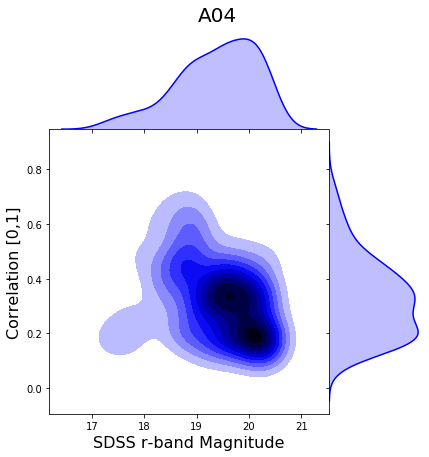

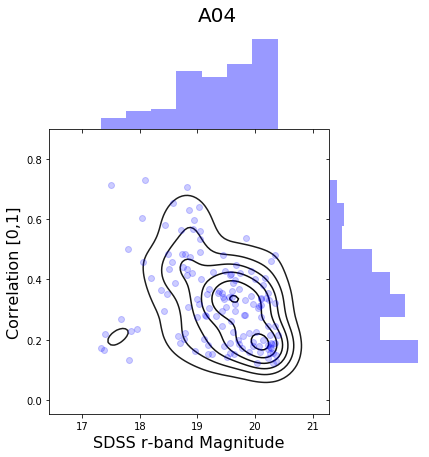

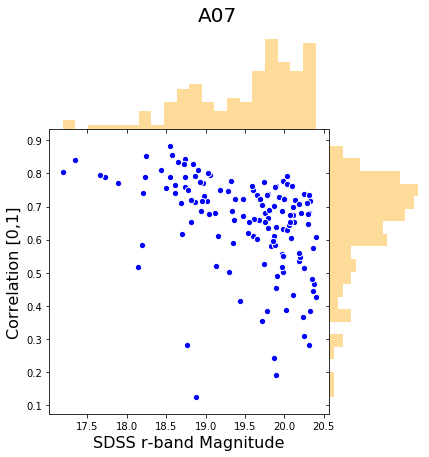

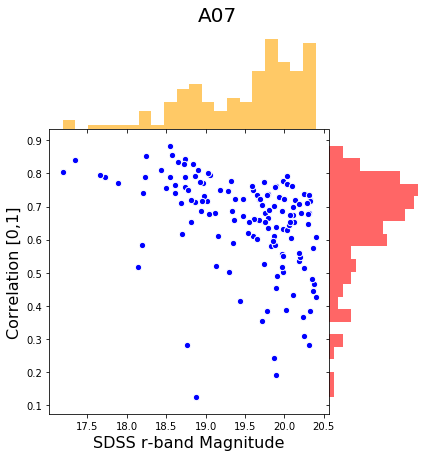

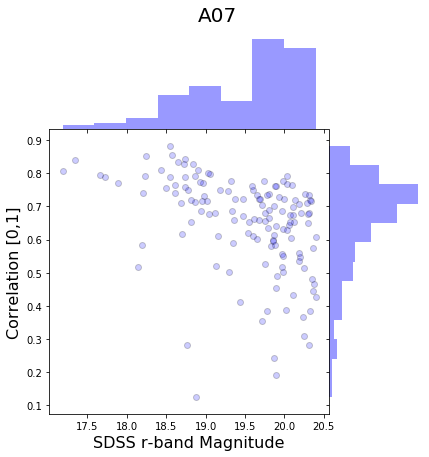

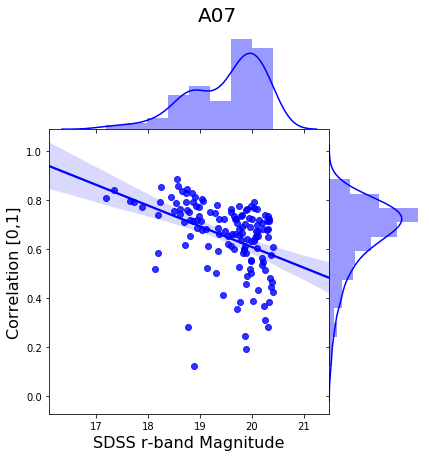

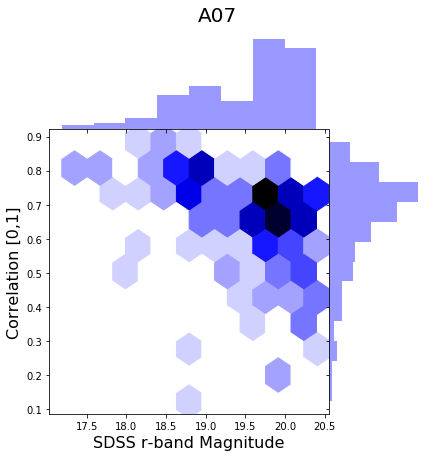

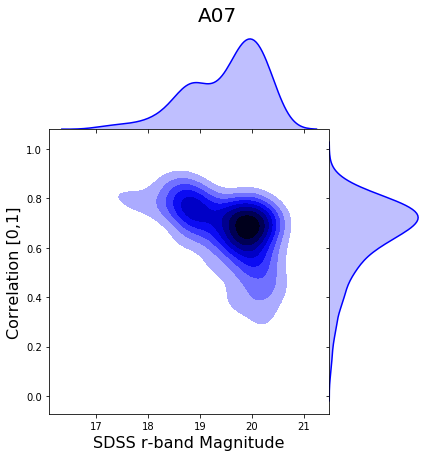

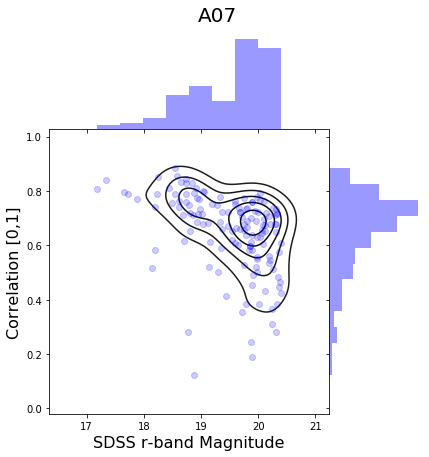

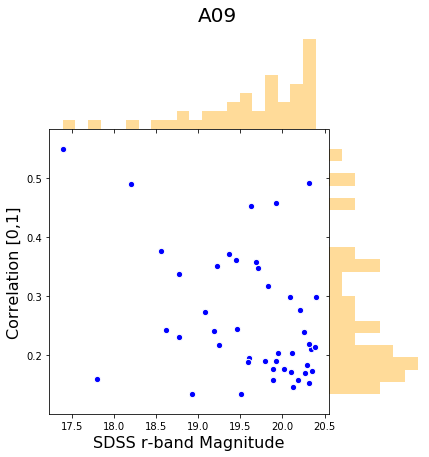

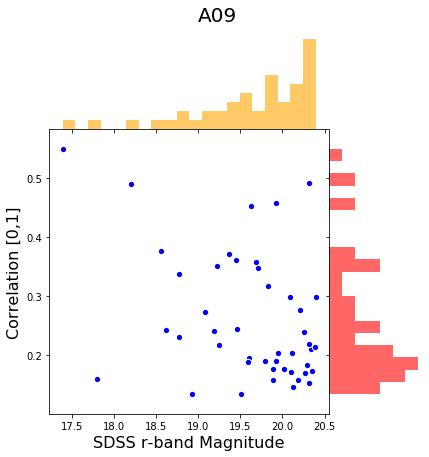

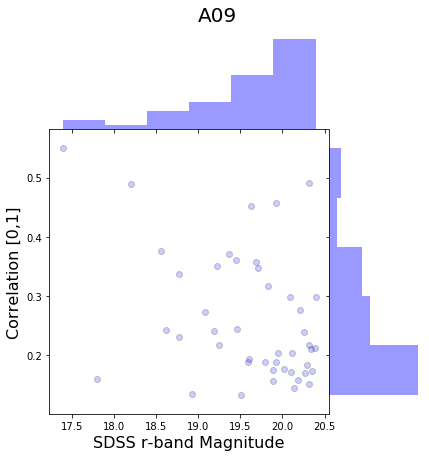

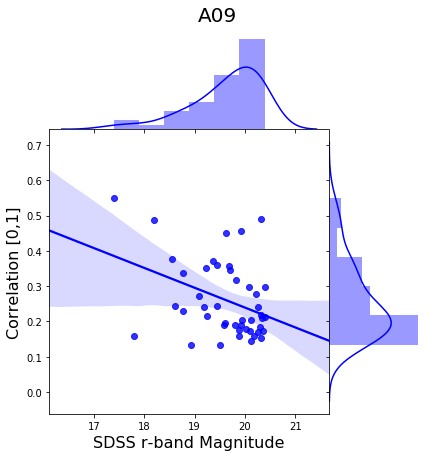

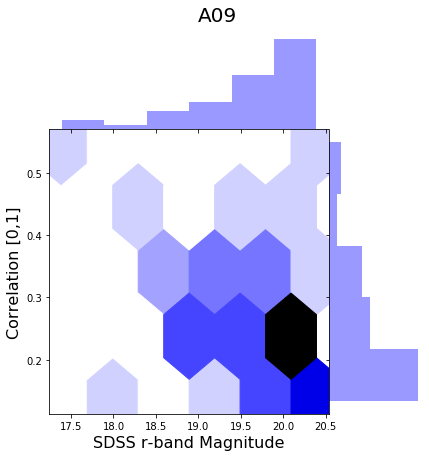

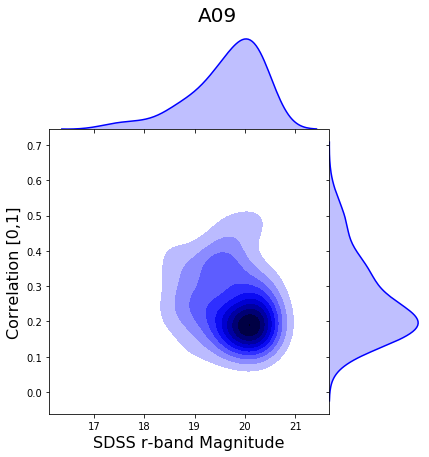

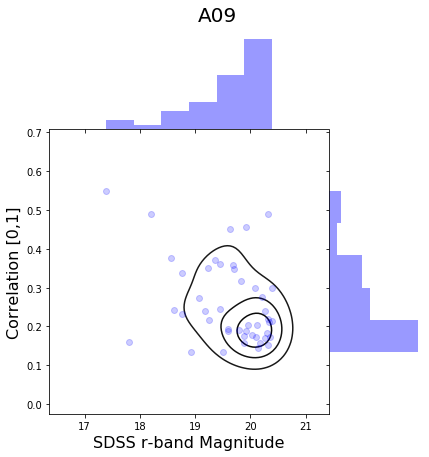

In [103]:
x,y="MAG", "cor"
xnam,ynam = 'SDSS r-band Magnitude', 'Correlation [0,1]'
ii = 0
for mask,masklocs in mask_selectors.items():
    maskonly_tab = tab[masklocs]
    generate_plot_examples(maskonly_tab,x,y,xnam,ynam,mask)
    ii += 1
    if ii > 3:
        break